In [1]:
#investigate potentially protective effect of rural residency on elderly population in counties with high and low ICU occupancy

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt

from sklearn.cluster import KMeans

In [2]:
nyte = pd.read_csv('../Generated_Files/nyt_enriched.csv')
irr2010 = pd.read_csv('../Data/IRR_2010.csv')

In [3]:
irr_tuples = []
for row in irr2010.iterrows():
    irr_tuples.append((row[1]["County Name"].split(" County")[0], #remove 'County'
                       row[1]["State"].lstrip(), #remove leading whitespace
                       row[1]['IRR2010']))
irr_df=pd.DataFrame(irr_tuples,columns=['county','state','irr2010'])

In [4]:
irr_nyte_merged = pd.merge(irr_df,nyte,left_on=['county','state'],right_on=['County','State']).drop(['county_x','county_y','state_x','state_y'],axis=1)
irr_nyte_merged

,irr2010,State,County,Total Population,num_icu_be,bed_utiliz,potential,pco60,popOver60,percentOver60,popOver60perICU,date,fips,cases,deaths,days_since_first_case,deaths_per_capita,cases_per_capita,deaths_per_case
0,0.48,Alabama,Autauga,55036,6.0,0.623113,30,0.031870,10523,19.1,1754.0,2020-07-16,1001.0,780,20,114,0.000363,0.014173,0.025641
1,0.44,Alabama,Baldwin,203360,44.0,1.657949,24,0.005158,53519,26.3,1049.0,2020-07-16,1003.0,1599,14,124,0.000069,0.007863,0.008755
2,0.53,Alabama,Barbour,26201,5.0,0.430640,44,0.046945,6150,23.5,1230.0,2020-07-16,1005.0,459,3,104,0.000114,0.017518,0.006536
3,0.49,Alabama,Blount,57667,6.0,0.499069,0,0.039312,13600,23.6,2267.0,2020-07-16,1009.0,424,1,113,0.000017,0.007353,0.002358
4,0.54,Alabama,Butler,20126,7.0,0.183251,28,0.036570,5151,25.6,736.0,2020-07-16,1013.0,669,32,113,0.001590,0.033241,0.047833
5,0.42,Alabama,Calhoun,115527,24.0,0.809041,73,0.009781,27115,23.5,1130.0,2020-07-16,1015.0,675,6,120,0.000052,0.005843,0.008889
6,0.50,Alabama,Chilton,43805,6.0,0.285458,4,0.035886,9429,21.5,1572.0,2020-07-16,1021.0,397,4,113,0.000091,0.009063,0.010076
7,0.55,Alabama,Clay,13407,4.0,0.291126,7,0.064891,3480,26.0,870.0,2020-07-16,1027.0,97,2,113,0.000149,0.007235,0.020619
8,0.49,Alabama,Coffee,51073,7.0,0.238052,32,0.030838,11027,21.6,1575.0,2020-07-16,1031.0,493,4,105,0.000078,0.009653,0.008114
9,0.47,Alabama,Colbert,54435,22.0,0.517603,63,0.011739,14062,25.8,639.0,2020-07-16,1033.0,655,8,113,0.000147,0.012033,0.012214


#### KMeans Clustering
Cluster without per capita stats, but include them after cluster assignments have been made

In [5]:
sample = irr_nyte_merged[['County','State','num_icu_be','irr2010','popOver60','deaths','Total Population']][irr_nyte_merged.num_icu_be<1000]

In [6]:
X = sample[['num_icu_be','irr2010','popOver60','deaths','Total Population']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
sample.loc[:,'cluster'] = kmeans.labels_

Cluster centers can be viewed as prototypical couties in each cluster

In [7]:
pd.DataFrame(kmeans.cluster_centers_,
             columns=['num_icu_be','irr2010','popOver60','deaths','Total Population'])

,num_icu_be,irr2010,popOver60,deaths,Total Population
0,155.144928,0.275870,139721.608696,380.789855,7.011658e+05
1,20.520443,0.470579,20536.778535,20.862862,9.185299e+04
2,426.100000,0.255500,408075.150000,823.750000,2.159981e+06


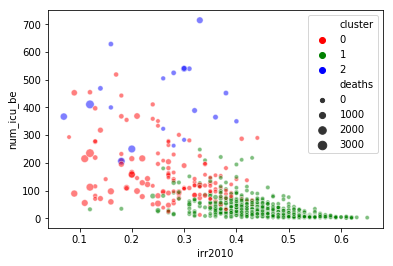

In [8]:
sns.scatterplot(x='irr2010',
                y='num_icu_be',
                size='deaths',
                hue='cluster',
                palette=['red','green','blue'],
                alpha=0.5,
                data=sample)

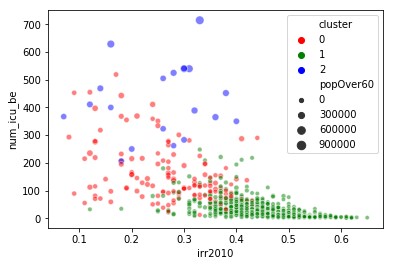

In [9]:
sns.scatterplot(x='irr2010',
                y='num_icu_be',
                size='popOver60',
                hue='cluster',
                palette=['red','green','blue'],
                alpha=0.5,
                data=sample)

In [10]:
sample[(sample.irr2010<0.3) & (sample.cluster==0)]

,County,State,num_icu_be,irr2010,popOver60,deaths,Total Population,cluster
88,Contra Costa,California,163.0,0.27,231404,93,1123678,0
114,San Francisco,California,293.0,0.08,179193,51,864263,0
138,Denver,Colorado,208.0,0.18,109403,398,678467,0
157,Fairfield,Connecticut,157.0,0.20,197334,1391,947328,0
158,Hartford,Connecticut,216.0,0.22,201242,1402,897417,0
161,New Haven,Connecticut,110.0,0.19,194911,1088,862127,0
166,New Castle,Delaware,93.0,0.26,112051,249,555036,0
178,Duval,Florida,351.0,0.25,171837,89,912043,0
184,Hillsborough,Florida,411.0,0.24,257269,232,1351087,0
188,Lee,Florida,141.0,0.28,239488,206,700165,0


In [11]:
sample[(sample.irr2010>0.3) & (sample.cluster==1)]

,County,State,num_icu_be,irr2010,popOver60,deaths,Total Population,cluster
0,Autauga,Alabama,6.0,0.48,10523,20,55036,1
1,Baldwin,Alabama,44.0,0.44,53519,14,203360,1
2,Barbour,Alabama,5.0,0.53,6150,3,26201,1
3,Blount,Alabama,6.0,0.49,13600,1,57667,1
4,Butler,Alabama,7.0,0.54,5151,32,20126,1
5,Calhoun,Alabama,24.0,0.42,27115,6,115527,1
6,Chilton,Alabama,6.0,0.50,9429,4,43805,1
7,Clay,Alabama,4.0,0.55,3480,2,13407,1
8,Coffee,Alabama,7.0,0.49,11027,4,51073,1
9,Colbert,Alabama,22.0,0.47,14062,8,54435,1


In [12]:
sample.to_csv('../Generated_Files/IRRClusteredSample.csv')

In [13]:
alt.Chart(sample).mark_point().encode(
    x='irr2010',
    y='num_icu_be',
    size='popOver60',
    tooltip=['County','State'],
    color='cluster'
)

alt.Chart(...)

In [14]:
alt.Chart(sample).mark_point().encode(
    x='irr2010',
    y='num_icu_be',
    size='deaths',
    tooltip=['County','State'],
    color='cluster'
)

alt.Chart(...)